# Matrix Factorisation on Amazon reviews dataset


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

#### Objective:
Find similar word cluster for a given word

# Loading the data


The dataset is available in two forms

1) .csv file
2)  SQLite Database




In order to load the data, We have used the SQLITE dataset as it easier to query the data and visualise the data efficiently. 
Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score id above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative"


Also we sort data by time-based slicing

## Loading Preprocessed Data

I have preprocessed the data separately for 250k points and stored in cleanedreviews.csv

In [45]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [46]:
!pip install glove_python

In [0]:
from glove import Corpus, Glove

In [0]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
#Loading preprocessed data
df=pd.read_csv('drive/My Drive/amazon/cleanedreviews.csv')
df.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,witty little book makes son laugh loud recite ...
1,1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,remember seeing show aired television years ag...
2,2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,beetlejuice well written movie everything exce...
3,3,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,twist rumplestiskin captured film starring mic...
4,4,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,twist rumplestiskin captured film starring mic...


In [8]:
df['Score'].value_counts()

1    215035
0     34965
Name: Score, dtype: int64

In [0]:
df['Class']=['positive' if s==1 else 'negative' for s in df['Score']]

In [99]:
sub_data=df[0:250000]
sub_data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,witty little book makes son laugh loud recite ...
1,1,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,1,940809600,This whole series is great way to spend time w...,remember seeing show aired television years ag...
2,2,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,1,944092800,Entertainingl Funny!,beetlejuice well written movie everything exce...
3,3,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,twist rumplestiskin captured film starring mic...
4,4,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,1,944438400,A modern day fairy tale,twist rumplestiskin captured film starring mic...


In [0]:
#coverting reviews in lists of words i-e, for each review a list of words will created
list_of_sent=[]
for sent in sub_data['Text'].values:
    filtered_sentence=[]
    for w in sent.split():
        for cleaned_words in w.split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [0]:
#Using Corpus to construct  co-occurance matrix
corpus=Corpus()
corpus.fit(list_of_sent,window=5)

In [102]:
#creating a Glove object which will use the matrix created in the above lines to create embeddings
#We can set the learning rate as it uses Gradient Descent and number of components

glove = Glove(no_components=5, learning_rate=0.05)
 
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')



#After the training glove object has the word vectors for the lines we have provided. But the dictionary still resides in the corpus object.
#We need to add the dictionary to the glove object to make it complete. by using :glove.add_dictionary(corpus.dictionary)

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [23]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 23.2MB/s 


In [0]:
#importing word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [0]:
#function to print wordcloud for different words
def cloud(c):
  wordcloud = WordCloud(max_font_size=50, max_words=100,collocations=False).generate_from_frequencies(c)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [0]:
similar=glove.most_similar('yummy',number=10)

In [105]:
similar

[('frutis', 0.996492443083793),
 ('tastes', 0.9944467571247136),
 ('delicious', 0.9935245182171553),
 ('vinger', 0.9925299089629726),
 ('rather', 0.9910518457238957),
 ('bit', 0.9905045859027032),
 ('melancholy', 0.9889789964338971),
 ('importantly', 0.9885956397653726),
 ('little', 0.9873806119969238)]

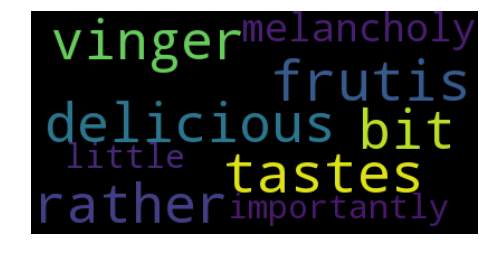

In [106]:
#wordcloud for Yummy
words=dict(similar)
cloud(words)

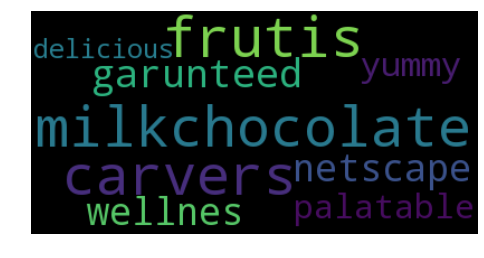

In [107]:
#tasty
words=glove.most_similar('tasty',number=10)
words=dict(words)
cloud(words)

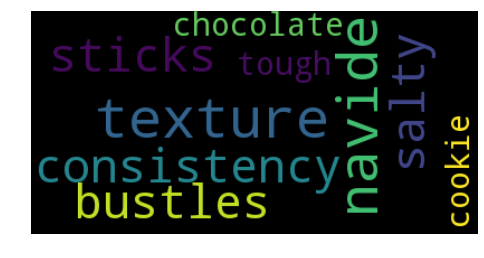

In [108]:
#spicy
words=glove.most_similar('spicy',number=10)
words=dict(words)
cloud(words)

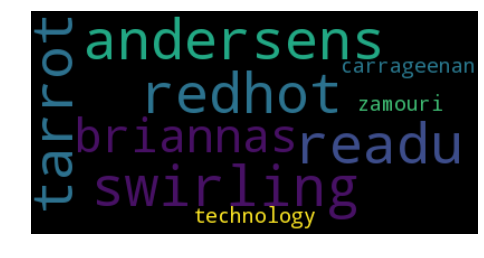

In [110]:
#biryani
words=glove.most_similar('biryani',number=10)
words=dict(words)
cloud(words)

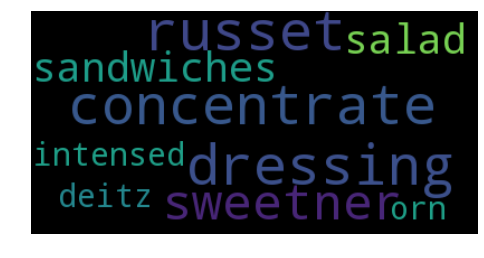

In [112]:
words=glove.most_similar('pizza',number=10)
words=dict(words)
cloud(words)

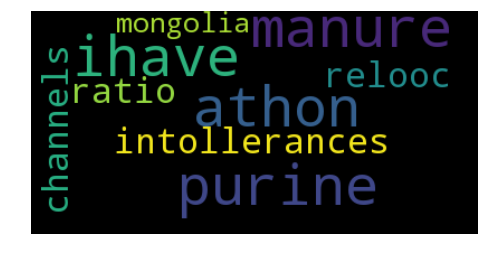

In [113]:
words=glove.most_similar('protien',number=10)
words=dict(words)
cloud(words)

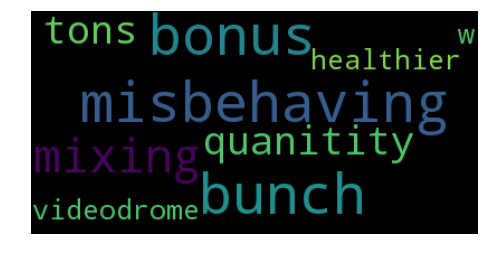

In [114]:
words=glove.most_similar('healthy',number=10)
words=dict(words)
cloud(words)